In [1]:
%reset

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

# font = {'size'   : 18}
# matplotlib.rc('font', **font)
# # Latex stuff
# pl.rc('text', usetex=True)
# pl.rc('font', family='serif')

# %matplotlib inline



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [19]:
# filenames = ['/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_0.4_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.4_0.55_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.55_0.7_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.7_0.85_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.85_0.95_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.95_1.05_dojk_True_njk_60_desy3_w1.pk',
#              '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk'    
#             ]

# labels = ['0.2 < z < 0.4','0.4 < z < 0.55','0.55 < z < 0.7', '0.7 < z < 0.85', '0.85 < z < 0.95', '0.95 < z < 1.05','All bins']


# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.



In [50]:
filenames = ['/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk',
'/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_1.05_dojk_True_njk_60_desy3_w0.pk',
'/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.15_0.9_dojk_True_njk_60_desy3_w1.pk',
            ]

labels = ['Maglim, 0.2 < z < 1.05, with weights','Maglim, 0.2 < z < 1.05, without weights','Redmagic, 0.15 < z < 0.9, with weights']


linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.



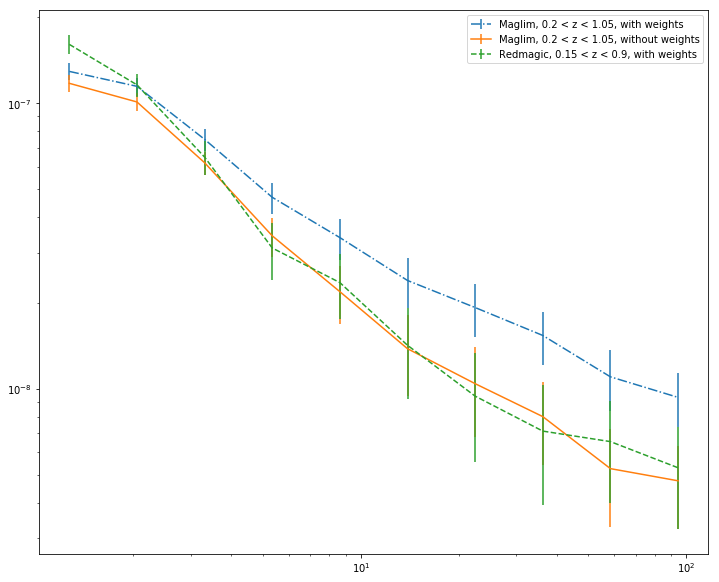

In [51]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((12,10))

for j in range(len(filenames)):
    filename = filenames[j]
    haloydata = pk.load(open(filename, "rb"))
    dytruth = haloydata['dytruth']

    randytruth = haloydata['randytruth']
    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']

        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(xi_dytruth.transpose(),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))


    
    ax.errorbar(factor*np.exp(dytruth.logr), xi_dytruth, yerr=xi_dytruth_sigma,label = labels[j], linestyle=linestyles[j])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()



In [52]:
def corr_mat(cov):
    dims = cov.shape
    corr = np.zeros(dims)
    for ii in xrange(0,dims[0]):
        for jj in xrange(0,dims[1]):
            corr[ii,jj] = cov[ii,jj]/np.sqrt(cov[ii,ii]*cov[jj,jj])

    return corr



In [53]:
import math
import numpy as np

the_gold_standard = { 0: (203.0/255.0, 15.0/255.0, 40.0/255.0),
                      1: (255.0/255.0, 165.0/255.0, 0.0),
                      2: (42.0/255.0, 46.0/255.0, 139.0/255.0),
                      3: (0.0/255.0, 153.0/255.0, 204.0/255.0),
                      4: (0.0/255.0, 221.0/255.0, 52.0/255.0),
                      5: (0.0, 0.75, 0.75),
                      6: (0.0, 0.0, 0.0),
                    }

# ******************************************************************************
# definition of color interpolation utilities:

def color_linear_interpolation( rgb_1, rgb_2, alpha ):
    """
    This function performs a linear color interpolation in RGB space.
    alpha has to go from zero to one and is the coordinate.
    """
    _out_color = []
    for _a,_b in zip(rgb_1,rgb_2):
        _out_color.append( float(_a +(_b-_a)*alpha) )
    return tuple(_out_color)


def nice_colors( num, colormap='the_gold_standard', interpolation_method='linear', output_format='RGB' ):
    """
    This function returns a color from a colormap defined above, according to the
    number entered.

    :param num: input number. Can be an integer or float.
        If the number is integer the function returns one of the colors in the
        colormap. If the number is a float returns the shade combining the two
        neighbouring colors.
    :type num: :class:`int` or :class:`float`

    :param colormap: a string containing the name of the colormap.
    :type colormap: :class:`string`

    :param interpolation_method: the method to interpolate between colors.
        Legal choices are:
            interpolation_method='linear', linear interpolation;
        Further interpolation methods will be added in the future.
    :type interpolation_method: :class:`string`

    :param output_format: output format of the color.
        Legal choices are:
            output_format='HEX'
            output_format='RGB' (default)
    :type output_format: :class:`string`

    :return: string with HEX color or tuple with RGB coordinates

    """
    # get the colormap:
    try:
        _cmap = globals()[str(colormap)]
    except:
        raise ValueError('Requested color map ('+str(colormap)+') does not exist.')
    # get the indexes of the color map:
    _idx_low = int( math.floor(num%len(_cmap)) )
    _idx_up  = int( math.floor((_idx_low+1)%len(_cmap)) )
    # perform color interpolation:
    if interpolation_method=='linear':
        _t = num%len(_cmap)-_idx_low
        _out_color = color_linear_interpolation(_cmap[_idx_low],_cmap[_idx_up],_t)
    else:
        raise ValueError('Requested color interpolation method ('+str(interpolation_method)+') does not exist.')
    # choose the output format:
    if output_format=='HEX':
        _out_color = '#%02x%02x%02x' % tuple( [ int(_c*255.) for _c in _out_color] )
        _out_color = str(_out_color)
    elif output_format=='RGB':
        pass
    else:
        raise ValueError('Requested output format ('+str(output_format)+') does not exist.')
    #
    return _out_color


SNR Maglim, 0.2 < z < 1.05, with weights:54.7 sigma
SNR Maglim, 0.2 < z < 1.05, without weights:66.4 sigma
SNR Redmagic, 0.15 < z < 0.9, with weights:51.9 sigma


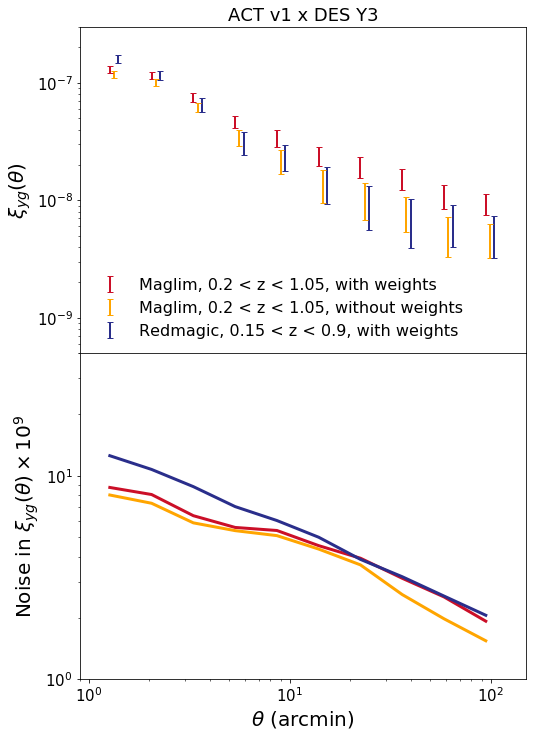

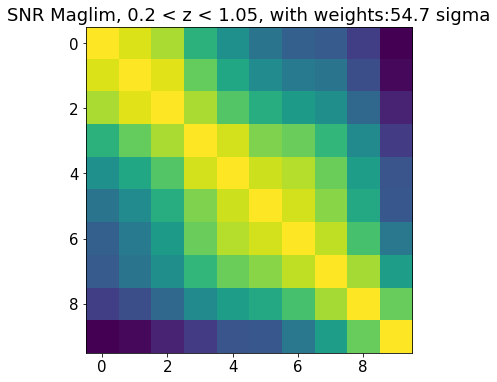

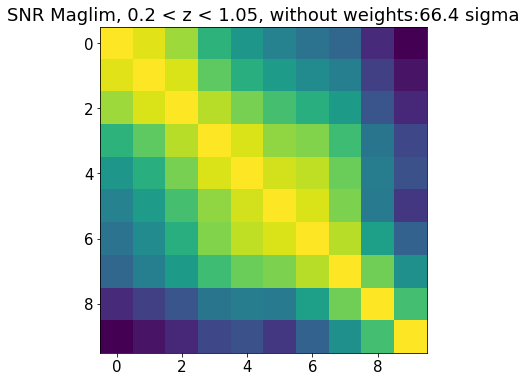

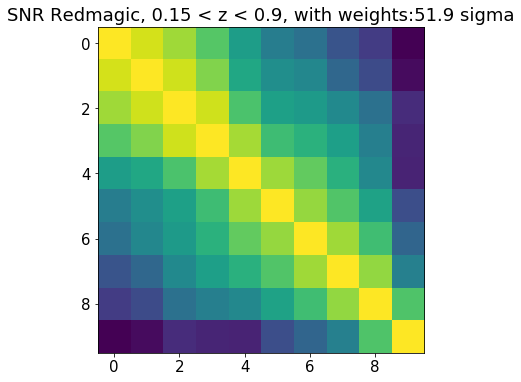

In [57]:
import pdb
# plot the galaxy-y correaltion
fig, ax = pl.subplots(2,1, sharex = True)
fig.set_size_inches((8,12))
fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

xmin = 0.9
xmax = 150.   


for j in range(len(filenames)):
    filename = filenames[j]
    haloydata = pk.load(open(filename, "rb"))

    dytruth = haloydata['dytruth']



    randytruth = haloydata['randytruth']

    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']


        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

    
#     ax[0].errorbar(factor*np.exp(dyrecon.logr)*1.02**(j), xi_dy,  yerr=xi_dy_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color = Color[j+1])
    
#     ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color =nice_colors(j))
    if labels[j] == 'All bins':
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='-', capsize=3, lw = 2, color ='k')
    else:
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color =nice_colors(j))


    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[0].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)

ax[0].set_xlim((xmin, xmax))
ax[0].set_ylim((5.0e-10,3.0e-7))
# ax.set_title('unitynullcmb nside bands methods')
ax[0].legend(fontsize = 20, frameon = False, loc = 'lower left')
#fig.tight_layout()

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)



# ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = 'Planck y', lw = 3, color = Color[0])
for j in range(len(filenames)):
    filename = filenames[j]
    haloydata = pk.load(open(filename, "rb"))
    dytruth = haloydata['dytruth']


    randytruth = haloydata['randytruth']
    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']

        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
        xi_cov = (1.0*(njk-1)/njk)* np.dot((xi_dytruth_all - xi_dytruth_mean).T , (xi_dytruth_all - xi_dytruth_mean))
        xi_corr = corr_mat(xi_cov)
        
        xi_invcov = np.linalg.inv(xi_cov)
#         pdb.set_trace()
        xi_snr = np.sqrt(np.dot(  np.array([dytruth.xi]), np.dot(xi_invcov, np.array([dytruth.xi]).T)  ))
        
        fig2, ax2 = pl.subplots(1,1)
        fig2.set_size_inches((8,6))
        ax2.imshow(xi_corr)
        ax2.tick_params(axis='both', which = 'minor', labelsize=15)
        ax2.tick_params(axis='both', which = 'major', labelsize=15)
        ax2.set_title('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma', size=18)
        fig2.savefig('corr_mat_' + str(labels[j]) + '.pdf')
        

        print('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma')

    if labels[j] == 'All bins':
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = 'k')
    else:
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = nice_colors(j))

 

ax[0].set_yscale('log')
ax[0].set_xlim((xmin, xmax))
# ax[0].set_ylim((2.0e-9,6.0e-8))
ax[0].legend(fontsize = 16, frameon = False, loc = 'lower left',ncol=1)    
    
ax[1].set_ylim((1.0, 40.0))
ax[1].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[1].set_ylabel(r'Noise in $\xi_{yg}(\theta) \times 10^9$', size = 20)


yticks = ax[1].yaxis.get_major_ticks()
yticks[-1].set_visible(False)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', which = 'minor', labelsize=15)

#pl.setp(ax[0].get_xticklabels(), visible=False)
#ax[0].tick_params(labelbottom=False)    
# print "ax[0].get_x = ", ax[0].get_xticklabels()[0].get_text()

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[1].set_yscale('log')
ax[0].set_title(r'ACT v1 x DES Y3', size=18 )
#xticks = ax[0].xaxis.get_minor_ticks()
#xticks[0].set_visible(False)

#xticks = ax[0].xaxis.get_major_ticks()
#xticks[0].set_visible(False)

#ax[0].set_xticklabels(['','','',''])
#ax[0].set_xticklabels(['','','',''], minor = True)



fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')






